# Regression Day 1 Challenge

This is Regression Day 1 Challenge

This challenge allows us to practice regression by picking the right model for our dataset and plotting it. 
For this I will first load the dataset to perform the regression analysis.
I will be using the bikes data set for this challenge that I downloaded from the kaggle website.

For this challenge I will be using the bikes dataset.

In [94]:
#First we load the bike dataset.
# importing bikes dataset and performing some exploratory data analysis
%matplotlib inline
import numpy as np
import pandas as pd
bikes = pd.read_csv('D://Anaconda//Lib//site-packages//pandas//tests//io//parser//data//nyc-east-river-bicycle-counts.csv')
bikes.head(5)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


We can see from the above sample data about the bikes, we can see that we basically have a count of the number of bikes that are passing through each of the 4 bridges in New York City.

As per Rachael Tatman 

There are many different types of regression. The specific family of regressions we’ll be learning are called “generalized linear models”. The important thing for you to know is that with this family of models, you need to pick a specific type of regression you’re interested in. The type of regression will depend on what type of data you’re trying to predict.

Linear: When you’re predicting a continuous value. (What temperature will it be today?)

Logistic: When you’re predicting which category your observation is in. (Is this is a cat or a dog?)

Poisson: When you’re predicting a count value. (How many dogs will I see in the park?)


As per the sample data we can see that we have a count of the number of bikes, so I will assume that we will require Poisson Distribution to predict count values, in this case how many bikes are passing through the different bridges in New York City.

In [95]:
bikes.describe()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,104.500000,60.580000,46.413333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,60.765944,11.183223,9.522796,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,0.000000,39.900000,26.100000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,52.250000,55.000000,44.100000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,104.500000,62.100000,46.900000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,156.750000,68.000000,50.000000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,209.000000,81.000000,66.000000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [96]:
import seaborn as sns

In [97]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(bikes['Brooklyn Bridge'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

In [98]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(bikes['Manhattan Bridge'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

In [99]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(bikes['Williamsburg Bridge'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

In [100]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(bikes['Queensboro Bridge'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

In [15]:
# We'll use the numpy isreal() function
# See https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.isreal.html
print("Is this variable numeric?")
all(bikes['Total'].apply(np.isreal)) # Check that every row is True.

Is this variable numeric?


True

As we can see all the bridge attributes and the total attribute tells us that that all the values are real whole numbers and so the most apt model that we can apply is to use the poisson distribution.

In [124]:
pd.isnull('Total')
pd.isnull('Queensboro Bridge')
pd.isnull('Williamsburg Bridge')
pd.isnull('Manhattan Bridge')
pd.isnull('Brooklyn Bridge')

False

We have no null values so we dont need to perform data cleaning on this data set. We may need to clean the data on the precipitation column in order to plot graphs between bridges and precipitation values as just by looking at the data we can see higher precipitation in this case on Snowy days with value 0.47 leads to less bikes moving on that day

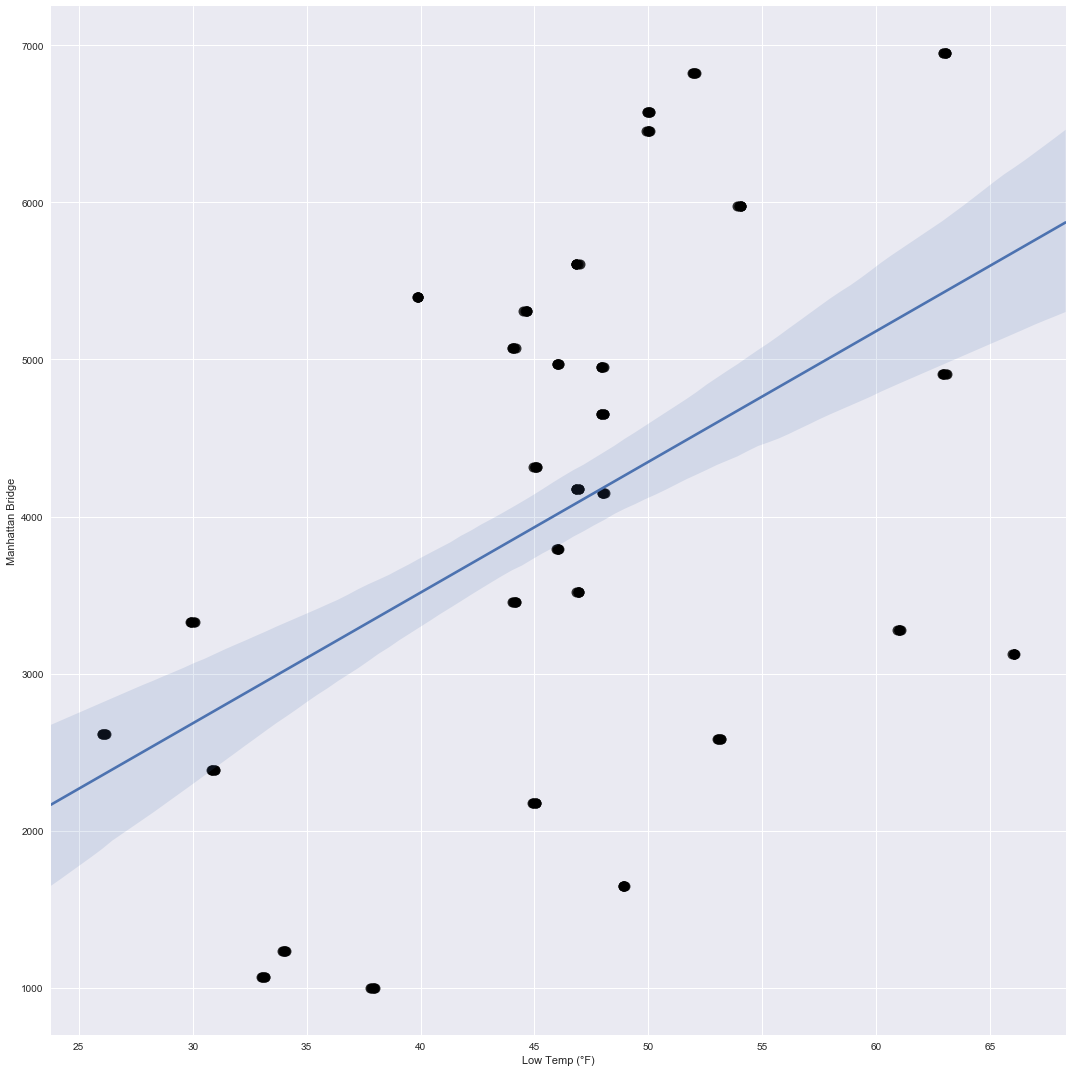

In [128]:
import seaborn as sns
sns.lmplot(x='Low Temp (°F)', y='Manhattan Bridge', data=bikes, fit_reg = 'Poisson',
scatter_kws={"marker": "D", "s": 100,"color": "black"}, size=15, x_jitter=.1)

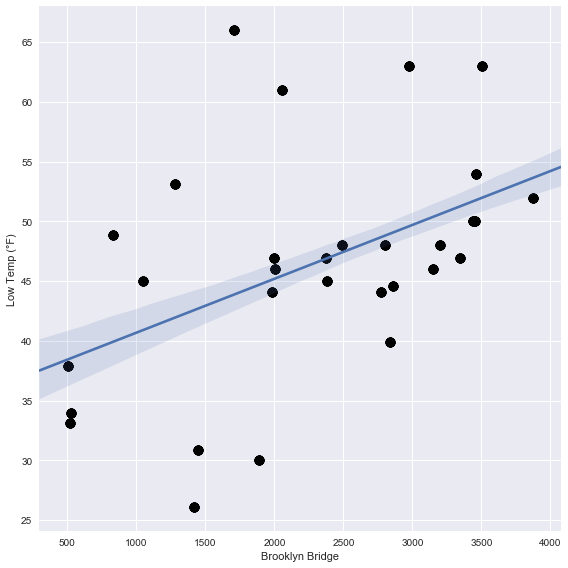

In [42]:
import seaborn as sns
sns.lmplot(x='Low Temp (°F)', y='Manhattan Bridge', data=bikes, fit_reg = 'Poisson',
scatter_kws={"marker": "D", "s": 100,"color": "black"}, size=15, x_jitter=.1)

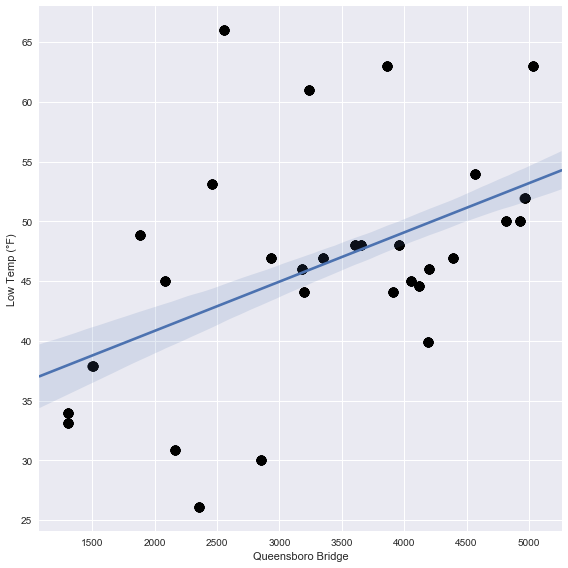

In [43]:
import seaborn as sns
sns.lmplot(x='Queensboro Bridge', y='Low Temp (°F)', data=bikes, fit_reg = 'Poisson',
scatter_kws={"marker": "D", "s": 100,"color": "black"}, size=8, x_jitter=.1)

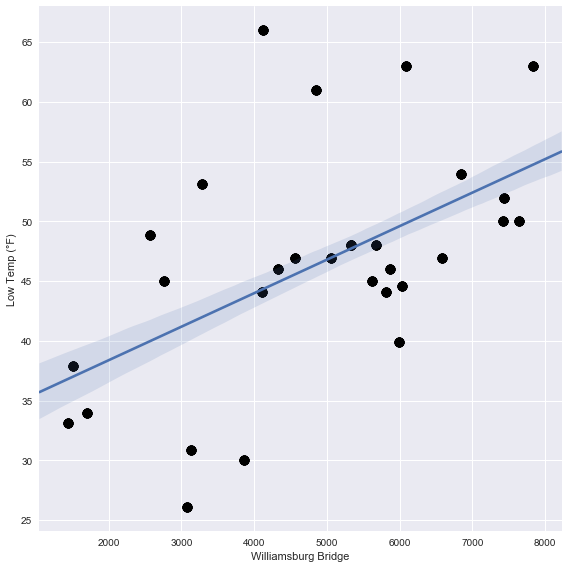

In [44]:
import seaborn as sns
sns.lmplot(x='Williamsburg Bridge', y='Low Temp (°F)', data=bikes, fit_reg = 'Poisson',
scatter_kws={"marker": "D", "s": 100,"color": "black"}, size=8, x_jitter=.1)

As we can see from the above plots that poisson distribution is a good fit.

Now we plot between bikes in different bridges with the precipitation values. Before that we have to clean the Precipitation columns as we have some characte values and NaN values that we have to remove.

In [104]:
bikes['Precipitation']=bikes['Precipitation'].apply(lambda x:str(x).replace('(S)',''))

In [147]:
bikes['Precipitation']=bikes['Precipitation'].apply(lambda x:str(x).replace('T',''))

In [148]:
bikes.head(50)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0000000.00000001000,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0000000.00010005000,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0000000.00000009000,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0000000.00040007000 000,521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0000000,1416.0,2617,3081.0,2357.0,9471
5,5,2016-04-06 00:00:00,2016-04-06 00:00:00,45.0,30.0,0000000,1885.0,3329,3856.0,2849.0,11919
6,6,2016-04-07 00:00:00,2016-04-07 00:00:00,57.0,53.1,0000000.00000009000,1276.0,2581,3282.0,2457.0,9596
7,7,2016-04-08 00:00:00,2016-04-08 00:00:00,46.9,44.1,0000000.00000001000,1982.0,3455,4113.0,3194.0,12744
8,8,2016-04-09 00:00:00,2016-04-09 00:00:00,43.0,37.9,0000000.00000009000,504.0,997,1507.0,1502.0,4510
9,9,2016-04-10 00:00:00,2016-04-10 00:00:00,48.9,30.9,0000000,1447.0,2387,3132.0,2160.0,9126
